This file reproduces the simulation experiments in our report

In [1]:
import maf_sghmc.alg as alg
import maf_sghmc.grad as grad
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns
import numba

Hamiltonian Dynamics

In [38]:
### Figure 2 in Chen et al. (2014)

## potential energy function
U2 = lambda x: 1/2*x**2
gradU2 = lambda x: x

## parameters
theta_init = np.array([0])
M = np.eye(1)
epsilon=0.1
T=300
m=50
V = np.array([4])
C = np.array([3]) 
V_hat = np.array([4])

In [39]:
theta_sghmc, r_sghmc = alg.sghmc_with_grad(gradU2, theta_init, M , C , V_hat, epsilon, T, m)
theta_hmc, r_hmc = alg.hmc(gradU2, U2, theta_init, M, epsilon, T, m, MH=False)
theta_sghmc_naive_nor, r_sghmc_naive_nor = alg.sghmc_naive(gradU2, U2, theta_init, M, V, epsilon, T, m, MH=False, resample=False)
theta_sghmc_naive, r_sghmc_naive = alg.sghmc_naive(gradU2, U2, theta_init, M, V, epsilon, T, m, MH=False, resample=True)

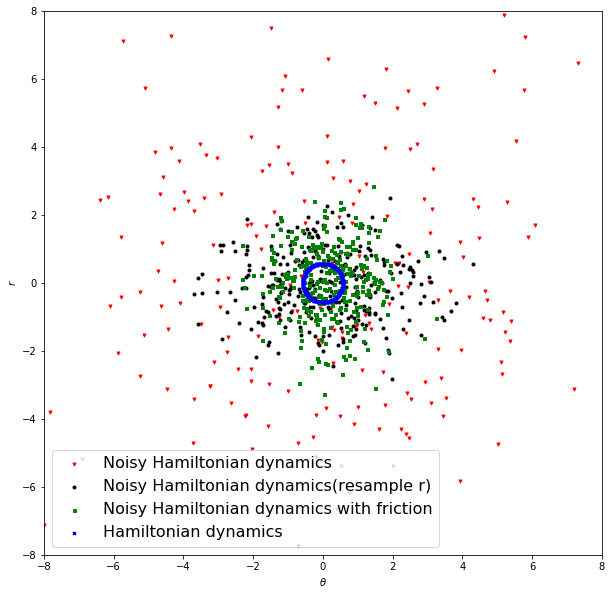

In [40]:
### Figure 2 in Chen et al. (2014)
f = plt.figure() 
f.set_size_inches(10, 10, forward=True)
plt.scatter(theta_sghmc_naive_nor, r_sghmc_naive_nor, color = 'red', marker = 'v', s=9, label = 'Noisy Hamiltonian dynamics')
plt.scatter(theta_sghmc_naive, r_sghmc_naive, color = 'black', marker = 'o', s=9, label = 'Noisy Hamiltonian dynamics(resample r)')
plt.scatter(theta_sghmc, r_sghmc, color = 'green', marker = 's', s=9, label = 'Noisy Hamiltonian dynamics with friction')
plt.scatter(theta_hmc, r_hmc, color = 'blue', marker = 'x', s=9, label = 'Hamiltonian dynamics')
plt.axis([-8, 8, -8, 8,])
plt.xlabel('$\\theta$')
plt.ylabel('$r$')
plt.legend( prop={'size': 16})
plt.show() #T=300, m=50
f.savefig('fig2.png')

1-D simulation

In [34]:
### Figure 1 in Chen et al. (2014)

## potential energy function
U = lambda x:  -2*x**2 + x**4
gradU =  lambda x: -4 * x +  4 * x**3 


## parameters
theta_init = np.array([0])
M = np.eye(1)
epsilon=0.1
T=15000
m=50
V = np.array([4])
C = np.array([3]) 
V_hat = np.array([4])


## true distribution
xs = np.linspace(-2,2,200)
ys = np.exp(-U(xs))
ys = (ys/sum(ys))/(xs[1]-xs[0])

In [6]:
theta_sghmc1, r_sghmc1 = alg.sghmc_with_grad(gradU, theta_init, M , C , V_hat, epsilon, T, m)
theta_hmc_mh1, r_hmc_mh1 =alg.hmc(gradU, U, theta_init, M, epsilon, T, m, MH=True, resample=True)
theta_hmc_nomh1, r_hmc_mh1 = alg.hmc(gradU, U, theta_init, M, epsilon, T, m, MH=False, resample=True)
theta_sghmc_naive_mh1, r_sghmc_naive_mh1 = alg.sghmc_naive(gradU, U, theta_init, M, V, epsilon, T, m, MH=True, resample=True)
theta_sghmc_naive_nomh1, r_sghmc_naive_nomh1 = alg.sghmc_naive(gradU, U, theta_init, M, V, epsilon, T, m, MH=False, resample=True)

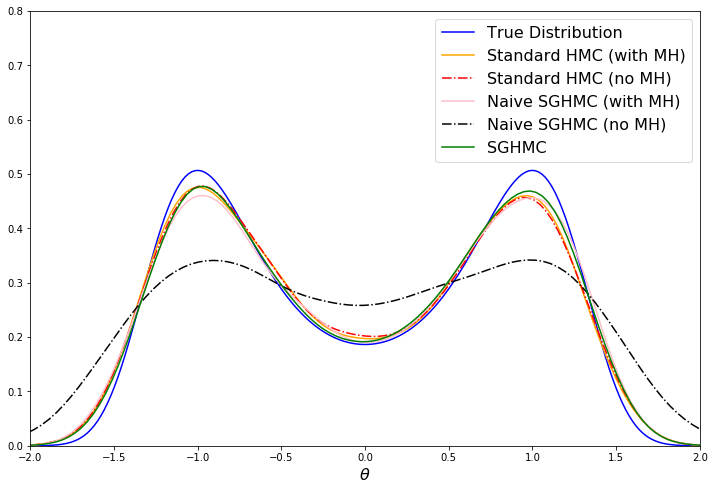

In [36]:
### Figure 1 in Chen et al. (2014)
f = plt.figure() 
f.set_size_inches(12, 8, forward=True)
plt.plot(xs, ys, color = 'blue', label = 'True Distribution')
sns.distplot(theta_hmc_mh1, hist = False, color = 'orange', label = 'Standard HMC (with MH)')
sns.distplot(theta_hmc_nomh1, hist = False, color = 'red', kde_kws={'linestyle':'-.'}, label = 'Standard HMC (no MH)')
sns.distplot(theta_sghmc_naive_mh1, hist = False, color = 'pink', label = 'Naive SGHMC (with MH)')
sns.distplot(theta_sghmc_naive_nomh1, hist = False, color = 'black', kde_kws={'linestyle':'-.'}, label = 'Naive SGHMC (no MH)')
sns.distplot(theta_sghmc1, hist = False, color = 'green', label = 'SGHMC')
plt.axis([-2, 2, 0, 0.8,])
plt.legend( prop={'size': 16})
plt.xlabel('$\\theta$', fontsize=16)
plt.show() #T=15000, m=50
f.savefig('fig1.png')

2-D simulation

In [8]:
### Figure 3 in Chen et al. (2014) (Relpace SGLD with HMC and naive SGHMC)

## potential energy function
sigma = np.array([[1, 0.9],[0.9, 1]])
U3 = lambda x: 0.5 * x.T @ np.linalg.inv(sigma) @ x
gradU3 = lambda x: np.linalg.inv(sigma) @ x + np.random.multivariate_normal(np.array([0,0]), np.eye(2))

## parameters
theta_init = np.array([0,0])
M = np.eye(2)
epsilon=0.1
T=50
m=50
V = V_hat = np.eye(2)
C = 3*np.eye(2)

In [10]:
theta_sghmc3, r_sghmc3 = alg.sghmc_with_grad(gradU3, theta_init, M , C , V_hat, epsilon, T, m)
theta_hmc_mh3, r_hmc_mh3 = alg.hmc(gradU3, U3, theta_init, M, epsilon, T, m, MH=True, resample=True)
theta_sghmc_naive_mh3, r_sghmc_naive_mh3 = alg.sghmc_naive(gradU3, U3, theta_init, M, V, epsilon, T, m, MH=True, resample=True)

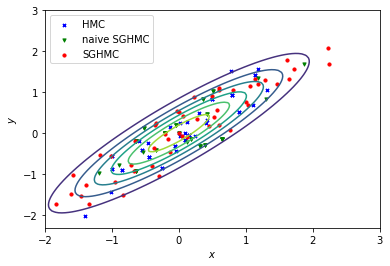

In [11]:
### Figure 3 in Chen et al. (2014) (Relpace SGLD with HMC and naive SGHMC)
xs = ys = np.linspace(-2, 3, 100)
x, y = np.meshgrid(xs, ys)
s_inv = np.linalg.inv(sigma)
z = np.exp(-0.5*(s_inv[0,0]*x**2 + 2*s_inv[1,0]*x*y + s_inv[1,1]*y**2))
plt.contour(x, y, z)
plt.scatter(theta_hmc_mh3[:,0], theta_hmc_mh3[:,1], s = 10, color = 'blue', marker = 'x', label = 'HMC')
plt.scatter(theta_sghmc_naive_mh3[:,0], theta_sghmc_naive_mh3[:,1], s = 10, color = 'green', marker = 'v', label = 'naive SGHMC')
plt.scatter(theta_sghmc3[:,0], theta_sghmc3[:,1], s = 10, color = 'red', marker = 'o', label = 'SGHMC')
plt.legend()
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.show()

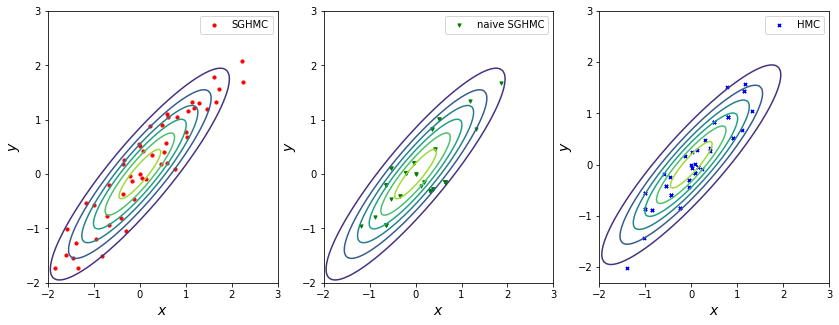

In [32]:
### Figure 3 in Chen et al. (2014) (Relpace SGLD with HMC and naive SGHMC)
xs = ys = np.linspace(-2, 3, 100)
x, y = np.meshgrid(xs, ys)
s_inv = np.linalg.inv(sigma)
z = np.exp(-0.5*(s_inv[0,0]*x**2 + 2*s_inv[1,0]*x*y + s_inv[1,1]*y**2))

f = plt.figure() 
f.set_size_inches(14, 5, forward=True)
plt.subplot(1, 3, 1)
plt.contour(x, y, z)
plt.scatter(theta_sghmc3[:,0], theta_sghmc3[:,1], s = 10, color = 'red', marker = 'o', label = 'SGHMC')
plt.legend()
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

plt.subplot(1, 3, 2)
plt.contour(x, y, z)
plt.scatter(theta_sghmc_naive_mh3[:,0], theta_sghmc_naive_mh3[:,1], s = 10, color = 'green', marker = 'v', label = 'naive SGHMC')
plt.legend()
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

plt.subplot(1, 3, 3)
plt.contour(x, y, z)
plt.scatter(theta_hmc_mh3[:,0], theta_hmc_mh3[:,1], s = 10, color = 'blue', marker = 'x', label = 'HMC')
plt.legend()
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)
plt.show()
f.savefig('fig3.png')

Bayesian Linear Regression

In [12]:
### Simulated Bayesian Linear Regression

## make up the data
p = 5
true_theta = np.arange(p)
size = 10000
X = np.random.randn(size,p)
y = np.dot(X,true_theta) + np.random.randn(size)
data = np.c_[y,X]

## parameters
theta_init = np.zeros(p)
M = np.eye(p)
C = 13*np.eye(p)
V_hat = np.zeros((p,p))
T = 1000
m = 50
epsilon = 0.0001
mb_size=1000


## prior and likelihood functions
logp_prior_grad = lambda theta: -theta # prior N(0,1)

def logp_data_grad(data, theta):
    """
    log likelihood of a linear regression 
    --------------
    
    Assume that the first column of the data is the predicted variable
    """
    X = data[:,1:]
    y = data[:,0]
    return X.T@y - X.T@X@theta

In [13]:
theta_sghmc4, r_sghmc4 = alg.sghmc_with_data(data, logp_data_grad, logp_prior_grad, mb_size, theta_init, M, C, V_hat, epsilon, T, m)

In [14]:
def U_grad_tilde(theta, data, logp_data_grad, logp_prior_grad, mb_size):
    """
    Stochastic gradient estimates of posterior density with respect to distribution parameters
    Based on a minibatch D_hat sampled uniformly at random from D
    ------------------------
    
    Dimensions
    -----------
    n: number of observations from the data
    m: dimension of the data

    Input
    -----
    D: n-by-m np array
        Dataset
        
    logp_data_grad: callable 'logp_data_grad(data, theta)'
        Gradient of likelihood of the data with respect to distribution parameters
    
    logp_prior_grad: callable 'logp_prior_grad(theta)'
        Gradient of prior with respect to distribution parameters
    
    mb_size: int
        Size of the minibatch
    
    theta: d-by-1 np array
        Distribution parameters
    
    Output
    -----
    U_tilde: d-by-1 np array
        Stochastic gradient estimates of posterior density with respect to distribution parameters
    """
    n = data.shape[0]
    data_hat = data[np.random.choice(range(n), size = mb_size, replace = False)]
    U_tilde = -(n/mb_size)*logp_data_grad(data_hat, theta) - logp_prior_grad(theta)
    return U_tilde


In [15]:
gradU = partial(U_grad_tilde, data=data, logp_data_grad=logp_data_grad, logp_prior_grad=logp_prior_grad, mb_size=1000)
gradU2 = partial(U_grad_tilde, data=data, logp_data_grad=logp_data_grad, logp_prior_grad=logp_prior_grad, mb_size=size)

In [17]:
theta_hmc4, r_hmc4 = alg.hmc(gradU, U, theta_init, M, epsilon, T, m, MH=False, resample=False)

In [18]:
sghmc_mean = theta_sghmc4.mean(axis=0)
sghmc_var = theta_sghmc4.var(axis=0) 
hmc_mean = theta_hmc4.mean(axis=0) 
hmc_var =theta_hmc4.var(axis=0) 
true_mean = np.arange(p)
true_var = np.zeros(p)

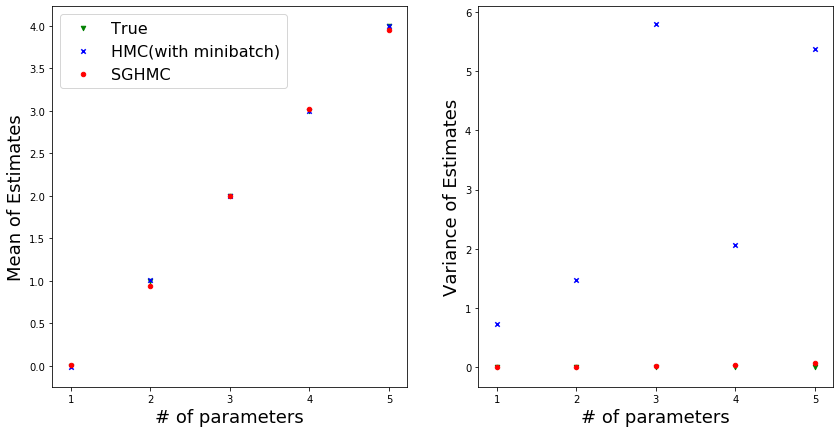

In [29]:
f = plt.figure() 
f.set_size_inches(14, 7, forward=True)
plt.subplot(1, 2, 1)
plt.scatter(1+np.arange(p), true_mean, s = 20, color = 'green', marker = 'v', label = 'True')
plt.scatter(1+np.arange(p), hmc_mean, s = 20, color = 'blue', marker = 'x', label = 'HMC(with minibatch)')
plt.scatter(1+np.arange(p), sghmc_mean, s = 20, color = 'red', marker = 'o', label = 'SGHMC')
plt.legend( prop={'size': 16})
plt.xlabel('# of parameters', fontsize = 18)
plt.ylabel('Mean of Estimates', fontsize = 18)
plt.xticks([1,2,3,4,5])

plt.subplot(1, 2, 2)
plt.scatter(1+np.arange(p), true_var, s = 20, color = 'green', marker = 'v', label = 'True')
plt.scatter(1+np.arange(p), hmc_var, s = 20, color = 'blue', marker = 'x', label = 'HMC(with minibatch)')
plt.scatter(1+np.arange(p), sghmc_var, s = 20, color = 'red', marker = 'o', label = 'SGHMC')
plt.xlabel('# of parameters', fontsize = 18)
plt.ylabel('Variance of Estimates', fontsize = 18)
plt.xticks([1,2,3,4,5])
plt.show()
f.savefig('fig4.png')

In [29]:
 theta_sghmc4.mean(axis=0), theta_sghmc4.var(axis=0) 

(array([0.02205324, 1.03890685, 1.9947424 , 2.97037698, 3.95402438]),
 array([0.00015219, 0.00432911, 0.01802068, 0.04081397, 0.07802588]))

In [23]:
 theta_hmc4.mean(axis=0), theta_hmc4.var(axis=0) 

(array([-0.0160462 ,  1.01146705,  2.00415458,  3.00421071,  4.00176104]),
 array([0.73885611, 1.47502344, 5.8011446 , 2.06599145, 5.37363889]))